In [1]:
import pandas
import numpy as np
import pandas as pd

#from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline  
import seaborn as sns


In [2]:

df = pd.read_csv("hUSCensus1990raw50K.csv.bz2",compression = "bz2")



In [3]:
df_demo = pd.DataFrame()


df_demo["AGE"] = df[["AGE"]].copy()
df_demo["INCOME"] = df[["INCOME" + str(i) for i in range(1,8)]].sum(axis = 1)

df_demo["YEARSCH"] = df[["YEARSCH"]].copy()
df_demo["ENGLISH"] = df[["ENGLISH"]].copy()
df_demo["FERTIL"] = df[["FERTIL"]].copy()
df_demo["YRSSERV"] = df[["YRSSERV"]].copy()



df_demo = pd.get_dummies(df_demo, columns = ["ENGLISH", "FERTIL" ])


In [15]:
df_lab = pd.DataFrame()
df_lab["AGE"] = df[["AGE"]].copy()
df_lab["INCOME"] = df[["INCOME" + str(i) for i in range(1,8)]].sum(axis = 1)

df_lab.head()

,AGE,INCOME
0,39,12790
1,13,0
2,71,3600
3,16,2724
4,63,3432


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Number of clusters: 3
Silhouette Coefficient: 0.159


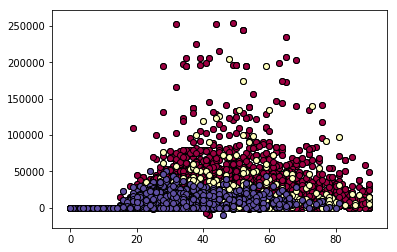

In [4]:

X = df_demo.values[np.random.choice(df_demo.values.shape[0], 10000)]

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_db = sc.fit_transform(X)


n_clusters = 3

labels = KMeans(n_clusters = n_clusters).fit_predict(X_db)




print('Number of clusters: %d' % n_clusters)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_db, labels))

unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')


* Use a seaborn pairplot ''sns.pairplot()'' to visualise your data

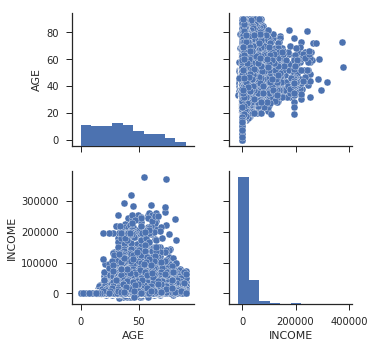

In [16]:
sns.pairplot(df_lab)

* Loop over different cluster size starting from 2 until 10, using all the features present and pick the one with the lowest silhouette score

In [ ]:
clusters_min = 2
clusters_max = 10

lowest_silhouette_score_kmeans = 1
lowest_silhouette_score_cluster_kmeans = 0

lowest_silhouette_score_agglomerative_clustering = 1
lowest_silhouette_score_cluster_agglomerative_clustering = 0

silhouette_scores_kmeans = {}
silhouette_scores_agglomerative_clustering = {}

# Take a sample of the data.
X = df_age_income.values[np.random.choice(df_age_income.values.shape[0], 10000)]

# Center the data: Zero mean and unit standard error.
X_db = StandardScaler().fit_transform(X)

for i in range(clusters_min, clusters_max + 1):
    
    results_kmeans = []
    results_agglomerative_clustering = []
    
    for j in range(10):
        # Returns integer array corresponding to clusters.
        labels_kmeans = KMeans(i).fit_predict(X_db)        
        results_kmeans.append(metrics.silhouette_score(X_db, labels_kmeans))
        
        labels_agglomerative_clustering = AgglomerativeClustering(i).fit_predict(X_db)        
        results_agglomerative_clustering.append(metrics.silhouette_score(X_db, labels_agglomerative_clustering))
        
    silhouette_scores_kmeans[i] = results_kmeans
    silhouette_score_mean_kmeans = np.mean(silhouette_scores_kmeans[i])
    
    silhouette_scores_agglomerative_clustering[i] = results_agglomerative_clustering
    silhouette_score_mean_agglomerative_clustering = np.mean(silhouette_scores_agglomerative_clustering[i])
    
    print("Cluster no. " + str(i) + ": Silhouette Coefficient KMeans %0.3f"
          % np.mean(silhouette_scores_kmeans[i])
          + " AgglomerativeClustering: %0.3f"
          % np.mean(silhouette_scores_agglomerative_clustering[i]))
    
    if (silhouette_score_mean_kmeans < lowest_silhouette_score):
        lowest_silhouette_score = silhouette_score_mean
        lowest_silhouette_score_cluster = i
        
    if (silhouette_score_mean_agglomerative_clustering < lowest_silhouette_score_agglomerative_clustering):
        lowest_silhouette_score_agglomerative_clustering = silhouette_score_mean_agglomerative_clustering
        lowest_silhouette_score_cluster_agglomerative_clustering = i
        
print("\nLowest Silhouette Coefficient KMeans: " + str(lowest_silhouette_score))
print("Lowest Silhouette Score Cluster KMeans: " + str(lowest_silhouette_score_cluster))

print("\nLowest Silhouette Coefficient AgglomerativeClustering: " + str(lowest_silhouette_score_agglomerative_clustering))
print("Lowest Silhouette Score Cluster AgglomerativeClustering: " + str(lowest_silhouette_score_cluster_agglomerative_clustering))

* (Optional) Save 10 runs for each cluster size and use a seaborn pointplot http://seaborn.pydata.org/generated/seaborn.pointplot.html without joining the lines to plot the confidence intervals for the silhouette score

* Change your clusterer to ``AgglomerativeClustering'' see here for more http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html and re-do the above experiment - what do you observe?

* Once you are done, save your changes in github